In [3]:
ROOT_PATH = '../../'


In [ ]:
import os
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

def read_reviews(base_path,split):
    texts = []
    ratings = []
    for sentiment in ["pos", "neg"]:
        folder = os.path.join(base_path, split, sentiment)
        for filename in os.listdir(folder):
            if filename.endswith(".txt"):
                path = os.path.join(folder, filename)
                match = re.search(r"_(\d+)\.txt$", filename)
                if match:
                    with open(path, "r", encoding="utf-8") as f:
                        texts.append(f.read())
                    ratings.append(float(match.group(1)))
                else:
                    print(f"No rating found for filename {filename}")
    return texts, np.array(ratings)

def vectorize_texts(texts):
    vectorizer = TfidfVectorizer(min_df=2) # appears at least in 2 documents
    X = vectorizer.fit_transform(texts)
    return X, vectorizer

base_path = os.path.join(ROOT_PATH,"data/raw/aclImdb")
texts_train, y_train = read_reviews(base_path,split="train")
X_train, vectorizer = vectorize_texts(texts_train)

texts_test, y_test = read_reviews(base_path,split="test")
X_test = vectorizer.transform(texts_test)


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

def show_top_words(X, vectorizer, top_n=20, plot=True):
    feature_names = vectorizer.get_feature_names_out()
    scores = np.array(X.sum(axis=0)).flatten()
    top_words = sorted(zip(feature_names, scores), key=lambda x: x[1], reverse=True)[:top_n]
    
    for word, score in top_words:
        print(f"{word}: {score:.4f}")
    
    if plot:
        df = pd.DataFrame(top_words, columns=["word", "score"])
        sns.barplot(data=df,x="word",y="score")
        plt.ylabel("Sum of TF-IDF")
        plt.xticks(rotation=90,ha="center")
        plt.title(f"Top {top_n} words")
        plt.show()

the: 4507.6605
and: 2277.6237
br: 2047.2720
of: 2025.9488
to: 1910.4843
is: 1635.2329
it: 1607.3952
in: 1376.9472
this: 1299.1049
that: 1185.7092
movie: 1082.5679
was: 1031.2046
film: 894.8683
as: 864.3973
you: 836.8199
for: 800.9331
but: 791.6957
with: 779.7968
on: 670.1640
not: 658.1724


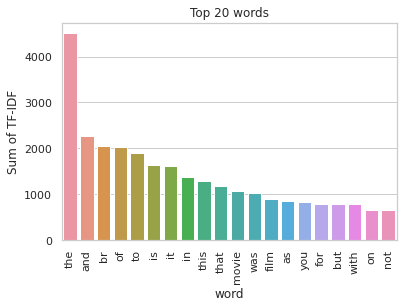

In [42]:
show_top_words(X_train,vectorizer)

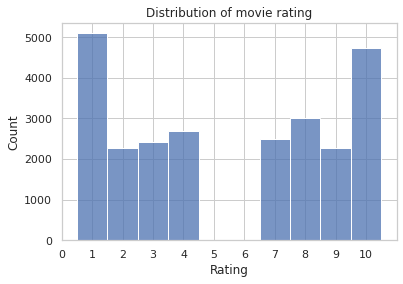

In [43]:
sns.histplot(y_train,bins=10,discrete=True)
plt.xticks(range(11))
plt.xlabel("Rating")
plt.title("Distribution of movie rating")
plt.show()

In [44]:
# Data export
import pickle
EXPORT_FOLDER = os.path.join(ROOT_PATH,'data/processed/imdb/')
if not os.path.exists(EXPORT_FOLDER):
    os.mkdir(EXPORT_FOLDER)
export_path = os.path.join(EXPORT_FOLDER, 'data.pickle')
with open(export_path,"wb") as f:
    pickle.dump((X_train,X_test,y_train,y_test), f)